<a href="https://colab.research.google.com/github/noora20FH/PCVK/blob/week7/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Noora Aulia Hidayat

TI-3I

2041720046

https://github.com/noora20FH/PCVK/blob/week7/week7.ipynb 

#PRACTICUM

In [1]:
from google.colab import drive


#Access my google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

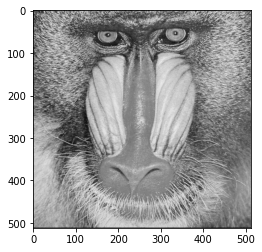

In [3]:
  #load the image
img = cv.imread('/content/drive/MyDrive/mandrill.tiff')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')


#Image Sharpen

In [4]:
  #image sharpen
kernel_sharpen = np.array([
      [0,-1,0],
      [-1,5,-1],
      [0,-1,0]
  ])


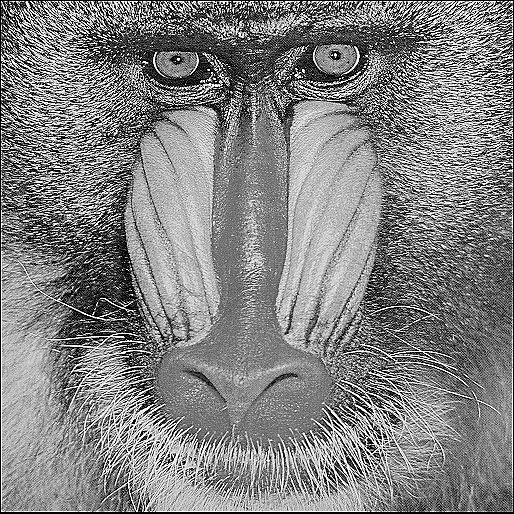

In [5]:
def convolution2d(image, kernel, stride, padding):
    # Get image and kernel dimensions
    image_rows, image_cols = image.shape
    kernel_rows, kernel_cols = kernel.shape

    # Compute the output image dimensions
    out_rows = (image_rows - kernel_rows + 2 * padding) // stride + 1
    out_cols = (image_cols - kernel_cols + 2 * padding) // stride + 1

    # Create a new image with the output dimensions
    output = np.zeros((out_rows, out_cols))

    # Apply padding to the input image
    padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    # Loop over the rows and columns of the output image
    for row in range(out_rows):
        for col in range(out_cols):
            # Loop over the rows and columns of the kernel
            sum = 0
            for krow in range(kernel_rows):
                for kcol in range(kernel_cols):
                    # Compute the corresponding row and column in the padded input image
                    irow = row * stride + krow
                    icol = col * stride + kcol

                    # Accumulate the sum of the element-wise product of the kernel and input image portion
                    sum += kernel[krow, kcol] * padded_image[irow, icol]

            # Assign the sum to the corresponding position in the output image
            output[row, col] = sum

    return output

filtered_image = convolution2d(img_gray, kernel_sharpen,1,2)
cv2_imshow(filtered_image)


#Emboss

In [6]:
  #image EMboss
kernel_emboss = np.array([
      [-2,-1,0],
      [-1,1,1],
      [0,1,2]
  ])


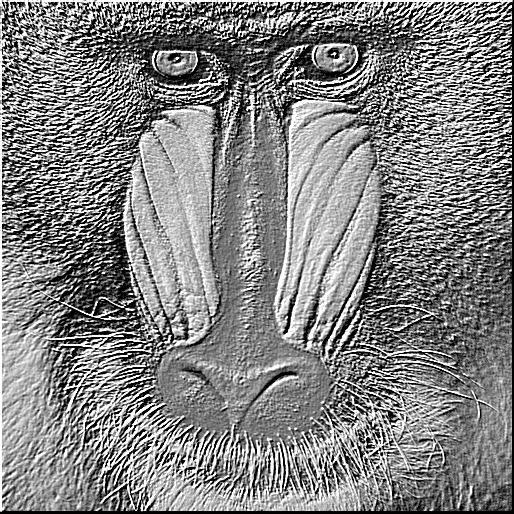

In [7]:
filtered_image2 = convolution2d(img_gray, kernel_emboss,1,2)
cv2_imshow(filtered_image2)

#Left Sobel Edge Detection

In [8]:
  #image Left Sobel Edge Detection
kernel_left_sobel_edge = np.array([
      [1,0,-1],
      [2,0,-2],
      [1,0,-1]
  ])


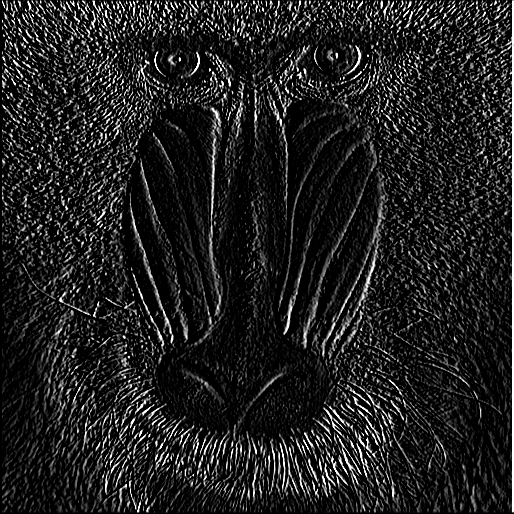

In [9]:
filtered_image3 = convolution2d(img_gray, kernel_left_sobel_edge,1,2)
cv2_imshow(filtered_image3)

#Canny Edge Detection

In [10]:
  #image Left Sobel Edge Detection
kernel_canny_edge_detection = np.array([
      [-1,-1,-1],
      [-1,8,-1],
      [-1,-1,-1]
  ])


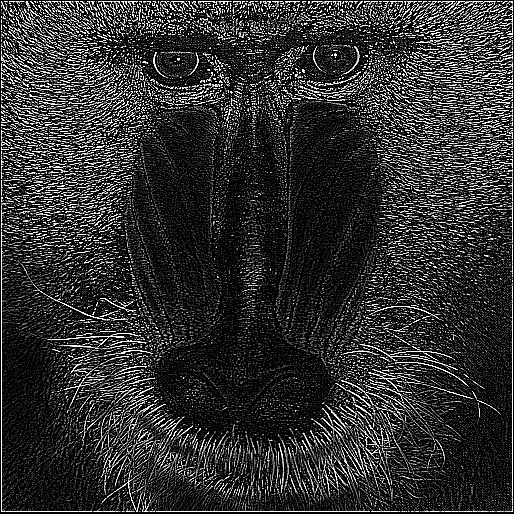

In [11]:
filtered_image4 = convolution2d(img_gray, kernel_canny_edge_detection,1,2)
cv2_imshow(filtered_image4)

#21 x 21 Gaussian Blur

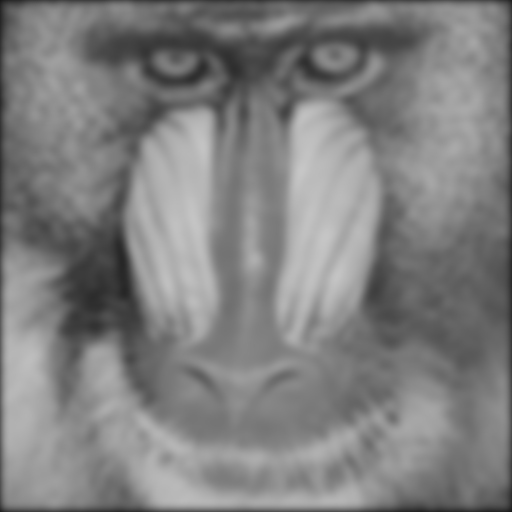

In [18]:
def convolution2d(image, kernel, stride, padding):
    # Get image and kernel dimensions
    image_rows, image_cols = image.shape
    kernel_rows, kernel_cols = kernel.shape

    # Compute the output image dimensions
    out_rows = (image_rows - kernel_rows + 2 * padding) // stride + 1
    out_cols = (image_cols - kernel_cols + 2 * padding) // stride + 1

    # Create a new image with the output dimensions
    output = np.zeros((out_rows, out_cols))

    # Apply padding to the input image
    padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    # Loop over the rows and columns of the output image
    for row in range(out_rows):
        for col in range(out_cols):
            # Loop over the rows and columns of the kernel
            sum = 0
            for krow in range(kernel_rows):
                for kcol in range(kernel_cols):
                    # Compute the corresponding row and column in the padded input image
                    irow = row * stride + krow
                    icol = col * stride + kcol

                    # Accumulate the sum of the element-wise product of the kernel and input image portion
                    sum += kernel[krow, kcol] * padded_image[irow, icol]

            # Assign the sum to the corresponding position in the output image
            output[row, col] = sum

    return output


# Create a 21x21 Gaussian blur filter
# size = 21
# sigma = 5
# x, y = np.meshgrid(np.linspace(-10, 10, size), np.linspace(-10, 10, size))
# kernel = np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
# kernel /= kernel.sum()

# Create a 21x21 Gaussian blur filter using the provided Gaussian kernel

kernel_size = 21
sigma = np.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

filtered_image5 = convolution2d(img_gray, gauss_kernel,1,10)
cv2_imshow(filtered_image5)

#Average Filter

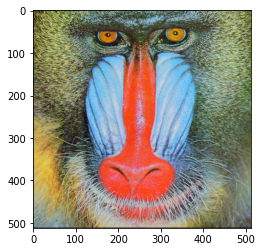

In [ ]:

img_m = cv.imread('/content/drive/MyDrive/mandrill.tiff')
img_rgb = cv.cvtColor(img_m,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)
     

## Averaging

mean function in numpy

In [ ]:
# Load the image
# image = cv2.imread('image.jpg')

# Convert the image to grayscale using the averaging method
gray = np.mean(img_rgb, axis=2).astype(np.uint8)

# Save the grayscale image
cv.imwrite('grayscale.jpg', gray)

True

In [ ]:
print('Implement Image Invert')
print('----------------------------')


averaged_img = np.zeros(img_rgb.shape, img_rgb.dtype)

#access each pixel
for y in range(img_rgb.shape[0]):
  for x in range(img_rgb.shape[1]):
    for c in range(img_rgb.shape[2]):
      gray = np.mean(img_rgb, axis=2).astype(np.uint8)
      # averaged_img[y,x,c] = np.clip((img_rgb[y, 0, 0] + img_rgb[0, x, 0] + img_rgb[0, 0, c])/ 3, 0, 255)


# img_avg = cv.imread('/content/drive/MyDrive/mandrill.tiff')
# img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
# fig, ax = plt.subplots(1,2)
# ax[0].imshow(img_rgb)
# ax[1].imshow(img_avg)

final_frame = cv.hconcat((img_m, averaged_img))
cv2_imshow(final_frame)

Implement Image Invert
----------------------------


In [ ]:
from PIL import Image

# Load the image

width, height = img_rgb.size

# Convert the image to grayscale using the averaging method
grayscale = np.zeros((height, width), dtype=np.uint8)
for y in range(height):
    for x in range(width):
        r, g, b = image.getpixel((x, y))
        gray = int((r + g + b) / 3)
        grayscale[y, x] = gray

# Create a PIL image from the grayscale array
grayscale_image = Image.fromarray(grayscale)

TypeError: ignored

##Lightness

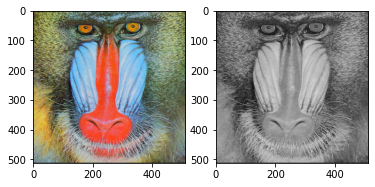

In [ ]:
img_light = cv.imread('/content/drive/MyDrive/mandrill.tiff')
img_light[:] = np.max(img_light,axis=-1,keepdims=10)/2+np.min(img_light,axis=-1,keepdims=10)/2
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)

#TASK


##1. Do the practical steps as above


##2. Create vertical lines and diagonal lines in the output image

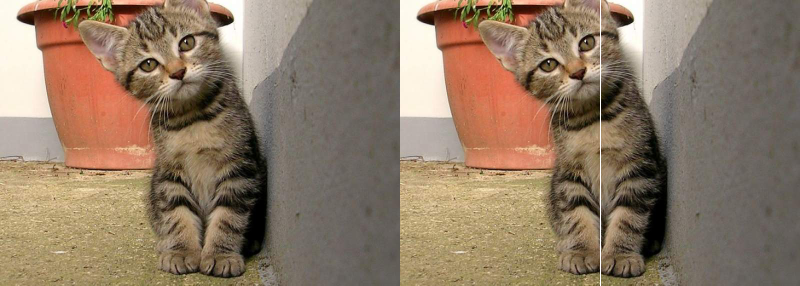

In [ ]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#create horizontal line in the middle of the image
for x in range(tinggi):
  image_3[x,int((lebar)/2)] = [255,255,255]

# image_3[int((tinggi)/2),10:100] = [255,255,255]
final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

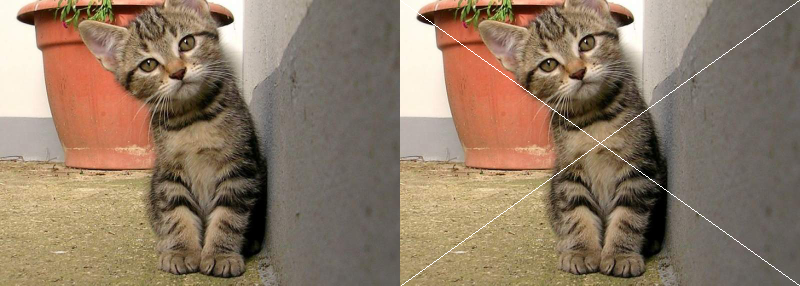

In [ ]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#create horizontal line in the middle of the image
# for x in range(tinggi):
#   image_3[x,int((lebar)/2)] = [255,255,255]

# image_3[int((tinggi)/2),10:100] = [255,255,255]

img = cv.line(image_3, (0,0), (lebar, tinggi), (255,255,255), 1)
            #(the_image, (start_point_top_left), (width,height), (B,G,R_lineColor), line_thicknese)
#create another line that crossing the first line
img = cv.line(img, (0,tinggi), (lebar, 0), (255,255,255), 1)

final_frame = cv.hconcat((image_2, img))
cv2_imshow(final_frame)

##3. Draw the horizontal white lines in the middle of image with certain length

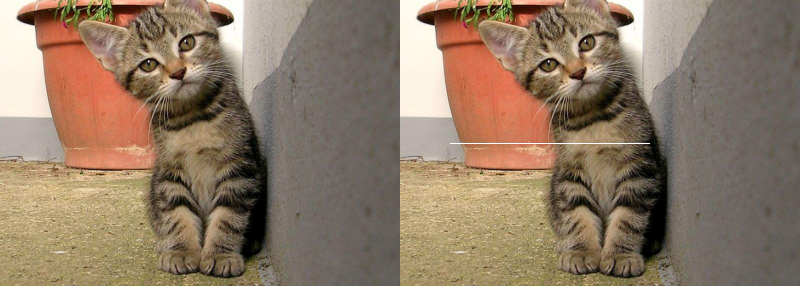

In [ ]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#create horizontal line in the middle of the image


image_3[int((tinggi)/2),50:250] = [255,255,255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

##4. Draw a box from a collection of white pixel in certain area in the image

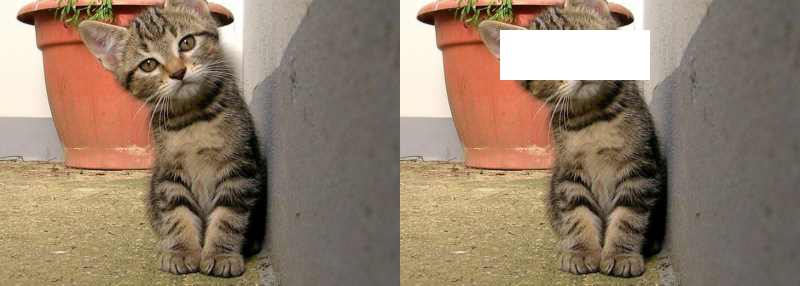

In [ ]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#create horizontal line in the middle of the image


image_3[30:80,100:250] = [255,255,255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)